In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

2023-12-09 14:01:48.606598: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 14:01:48.640079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 14:01:48.640105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 14:01:48.641072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 14:01:48.646372: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 14:01:48.647155: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
ls

Chicken.ipynb  data/


# Split dataframe to train, valid, and test

In [3]:
data_dir = "data/Train/"
csv_dir = "data/train_data.csv"

In [4]:
df = pd.read_csv(csv_dir)
df.head()

,images,label
0,salmo.1558.jpg,Salmonella
1,cocci.1866.jpg,Coccidiosis
2,cocci.171.jpg,Coccidiosis
3,salmo.1484.jpg,Salmonella
4,ncd.100.jpg,New Castle Disease


In [5]:
# change column name
df.columns = ["filepaths","labels"]
df.head()

,filepaths,labels
0,salmo.1558.jpg,Salmonella
1,cocci.1866.jpg,Coccidiosis
2,cocci.171.jpg,Coccidiosis
3,salmo.1484.jpg,Salmonella
4,ncd.100.jpg,New Castle Disease


In [6]:
df['filepaths'] = df['filepaths'].apply(lambda x : os.path.join(data_dir, x))
df.head()

,filepaths,labels
0,data/Train/salmo.1558.jpg,Salmonella
1,data/Train/cocci.1866.jpg,Coccidiosis
2,data/Train/cocci.171.jpg,Coccidiosis
3,data/Train/salmo.1484.jpg,Salmonella
4,data/Train/ncd.100.jpg,New Castle Disease


In [7]:
df.groupby('labels')['labels'].count()

labels
Coccidiosis           2476
Healthy               2404
New Castle Disease     562
Salmonella            2625
Name: labels, dtype: int64

In [8]:
filter = (df['labels'] == 'Coccidiosis') | (df['labels'] == 'Healthy')
df = df[filter]

In [9]:
df.groupby('labels')['labels'].count()

labels
Coccidiosis    2476
Healthy        2404
Name: labels, dtype: int64

In [10]:
df.head()

,filepaths,labels
1,data/Train/cocci.1866.jpg,Coccidiosis
2,data/Train/cocci.171.jpg,Coccidiosis
7,data/Train/healthy.1748.jpg,Healthy
8,data/Train/healthy.1156.jpg,Healthy
9,data/Train/healthy.1215.jpg,Healthy


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Create train df
strat = df['labels']
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify=strat)

In [13]:
train_df.head()

,filepaths,labels
4956,data/Train/pcrcocci.296.jpg,Coccidiosis
88,data/Train/cocci.1146.jpg,Coccidiosis
817,data/Train/healthy.54.jpg,Healthy
1251,data/Train/healthy.840.jpg,Healthy
4425,data/Train/cocci.1680.jpg,Coccidiosis


In [14]:
dummy_df.head()

,filepaths,labels
5348,data/Train/cocci.1734.jpg,Coccidiosis
1353,data/Train/cocci.1407.jpg,Coccidiosis
1706,data/Train/cocci.589.jpg,Coccidiosis
7011,data/Train/healthy.681.jpg,Healthy
1433,data/Train/pcrcocci.143.jpg,Coccidiosis


In [15]:
# valid and test dataframe
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

In [16]:
valid_df.head()

,filepaths,labels
1709,data/Train/healthy.1759.jpg,Healthy
3421,data/Train/healthy.616.jpg,Healthy
3883,data/Train/healthy.1677.jpg,Healthy
3067,data/Train/healthy.1143.jpg,Healthy
948,data/Train/pcrhealthy.311.jpg,Healthy


In [17]:
test_df.head()

,filepaths,labels
3367,data/Train/healthy.1356.jpg,Healthy
151,data/Train/cocci.1237.jpg,Coccidiosis
2270,data/Train/healthy.874.jpg,Healthy
7210,data/Train/cocci.1978.jpg,Coccidiosis
6654,data/Train/healthy.943.jpg,Healthy


### Created function

In [18]:
def split_data(data_dir, csv_dir):
    df = pd.read_csv(csv_dir)
    # change column name
    df.columns = ["filepaths","labels"]
    df['filepaths'] = df['filepaths'].apply(lambda x : os.path.join(data_dir, x))

    # only extracting two types of images
    filter = (df['labels'] == 'Coccidiosis') | (df['labels'] == 'Healthy')
    df = df[filter]
    
    # Create train df
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify=strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)
    return train_df, valid_df, test_df

In [19]:
train_df, valid_df, test_df = split_data(data_dir, csv_dir)

In [20]:
train_df.head()

,filepaths,labels
4956,data/Train/pcrcocci.296.jpg,Coccidiosis
88,data/Train/cocci.1146.jpg,Coccidiosis
817,data/Train/healthy.54.jpg,Healthy
1251,data/Train/healthy.840.jpg,Healthy
4425,data/Train/cocci.1680.jpg,Coccidiosis


# Generate images from dataframe

In [21]:
# define model parameters
img_size = (224, 224)
channels = 3 # either BGR or Grayscale
color = 'rgb'
img_shape = (img_size[0], img_size[1], channels)

In [22]:
ts_length = len(test_df)
batch_size = 16
test_batch_size = 16
test_steps = ts_length // test_batch_size

In [23]:
ts_length, test_batch_size, test_steps

(488, 16, 30)

In [24]:
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

In [25]:
train_gen = tr_gen.flow_from_dataframe(train_df, x_col = 'filepaths', y_col = 'labels', target_size= img_size, class_mode = "binary",
                                      color_mode= color, shuffle= True, batch_size= batch_size)
valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col = 'filepaths', y_col = 'labels', target_size= img_size, class_mode = "binary",
                                      color_mode= color, shuffle= True, batch_size= batch_size)
 # Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df, x_col = 'filepaths', y_col = 'labels', target_size= img_size, class_mode = "binary",
                                     color_mode= color, shuffle= False, batch_size= test_batch_size)

Found 3904 validated image filenames belonging to 2 classes.
Found 488 validated image filenames belonging to 2 classes.
Found 488 validated image filenames belonging to 2 classes.


### Created Function for Generate images from dataframe

In [26]:
def create_gens (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. 
    '''
    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size
    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe(train_df, x_col = 'filepaths', y_col = 'labels', target_size= img_size, class_mode = "binary",
                                          color_mode= color, shuffle= True, batch_size= batch_size)
    valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col = 'filepaths', y_col = 'labels', target_size= img_size, class_mode = "binary",
                                          color_mode= color, shuffle= True, batch_size= batch_size)
     # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe(test_df, x_col = 'filepaths', y_col = 'labels', target_size= img_size, class_mode = "binary",
                                         color_mode= color, shuffle= False, batch_size= test_batch_size)
    return train_gen, valid_gen, test_gen

# Print sample Images fromd data_gen

In [27]:
train_gen, valid_gen, test_gen = create_gens (train_df, valid_df, test_df, batch_size = 40)

Found 3904 validated image filenames belonging to 2 classes.
Found 488 validated image filenames belonging to 2 classes.
Found 488 validated image filenames belonging to 2 classes.


In [28]:
gen = test_gen

In [29]:
gen.class_indices

{'Coccidiosis': 0, 'Healthy': 1}

In [30]:
list(gen.class_indices.keys())

['Coccidiosis', 'Healthy']

In [31]:
classes = list(gen.class_indices.keys())

When you create an ImageDataGenerator, it doesn't generate images immediately. Instead, it's used as a generator that produces batches of images on-the-fly during training or testing. The next() function is used to extract the next batch from this generator.

In [32]:
images, labels  = next(gen) # get a batch size samples from the generator

In [33]:
# calculate number of displayed samples
length = len(labels)        # length of batch size
sample = min(length, 25)    # check if sample less than 25 images

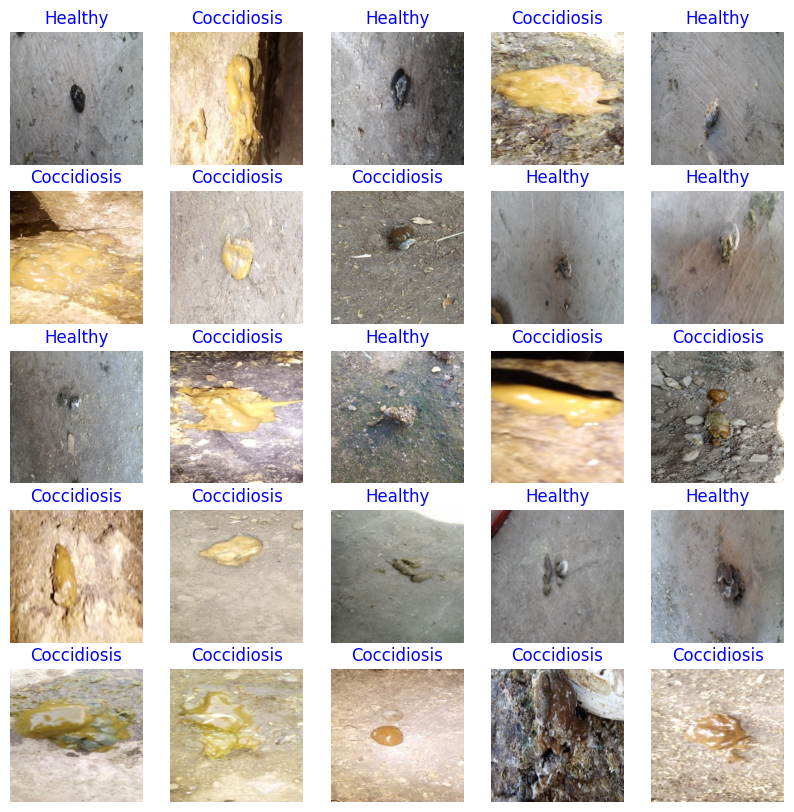

In [34]:
plt.figure(figsize= (10, 10))

for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    class_name = classes[int(labels[i])]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

### Functions to Display data sample

In [35]:
def show_images(gen):
    classes = list(gen.class_indices.keys())
    images, labels  = next(gen) # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (10, 10))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        class_name = classes[int(labels[i])]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

In [36]:
# show_images(train_gen)

In [37]:
import keras

# Callbacks


In [38]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

# Generic Model Creation

In [39]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
import time

In [41]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]),
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [42]:
model.compile(Adamax(learning_rate= 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                        

# Set Callback Parameters

In [44]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

In [45]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?


 y


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /40     2.044   87.961   0.75136  72.746   0.00100  0.00100  accuracy     0.00    116.70 
 2 /40     0.236   93.443   0.23074  92.418   0.00100  0.00100  val_loss    69.29    116.02 
 3 /40     0.115   95.953   0.10899  96.107   0.00100  0.00100  val_loss    52.76    114.08 
 4 /40     0.126   96.004   0.12530  95.287   0.00100  0.00050  val_loss    -14.96   113.08 
 5 /40     0.073   97.541   0.10634  96.926   0.00050  0.00050  val_loss     2.43    113.17 
enter H to halt training or an integer for number of epochs to run then ask again


 H


training has been halted at epoch 5 due to user input
training elapsed time was 0.0 hours,  9.0 minutes, 36.61 seconds)


# Evaluate model

In [46]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 3s 353ms/step - loss: 0.2108 - accuracy: 0.9426
Train Loss:  0.08462397754192352
Train Accuracy:  0.981249988079071
--------------------
Validation Loss:  0.0832277312874794
Validation Accuracy:  0.9750000238418579
--------------------
Test Loss:  0.21075884997844696
Test Accuracy:  0.9426229596138


# Plot history of training

In [70]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (15, 4))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

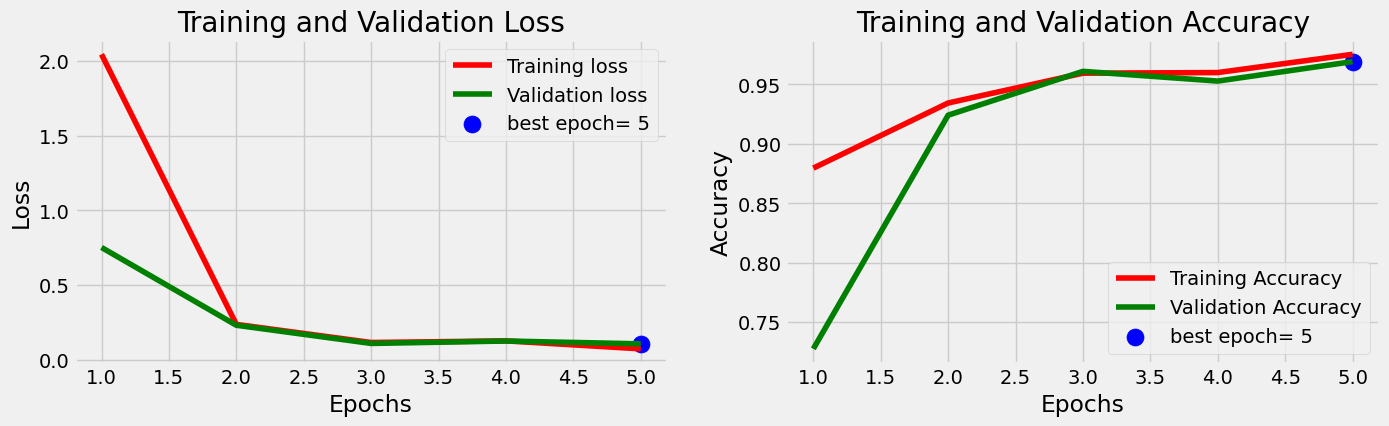

In [71]:
plot_training(history)

# Get Predictions

In [74]:
preds = model.predict(test_gen)
y_pred = np.where(preds > 0.5, 1, 0)
y_pred = y_pred.reshape(1, len(y_pred))[0]

8/8 [==============================] - 3s 371ms/step


# Confusion Matrics and Classification Report

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [76]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (5, 5))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

Confusion Matrix, Without Normalization
[[229  19]
 [  9 231]]
              precision    recall  f1-score   support

 Coccidiosis       0.96      0.92      0.94       248
     Healthy       0.92      0.96      0.94       240

    accuracy                           0.94       488
   macro avg       0.94      0.94      0.94       488
weighted avg       0.94      0.94      0.94       488



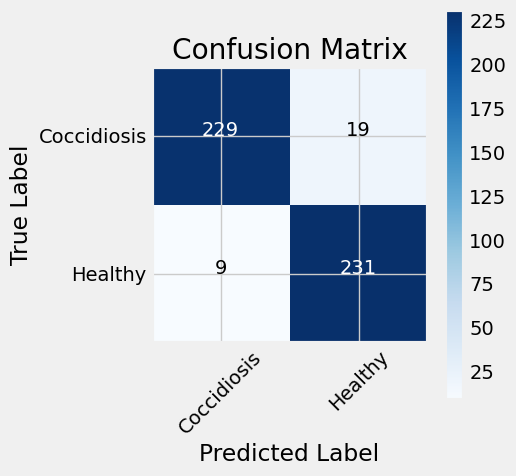

In [77]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

# Save model

In [78]:
model_name = model.input_names[0][:-6]
subject = 'Chicken Disease'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

/home/lucky/Documents/data_science_interview/Udemy/udemy-env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model was saved as conv2d-Chicken Disease-94.26.h5
weights were saved as conv2d-Chicken Disease-weights.h5


# Generate CSV files containing classes indicies & image size

In [79]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as Chicken Disease-class_dict.csv
